In [2]:
import os.path

import matplotlib.pyplot as plt
import numpy as np
import cv2

In [3]:
def show(image):
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()


def show_raw(image):
    plt.figure(figsize=(30, 30))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()


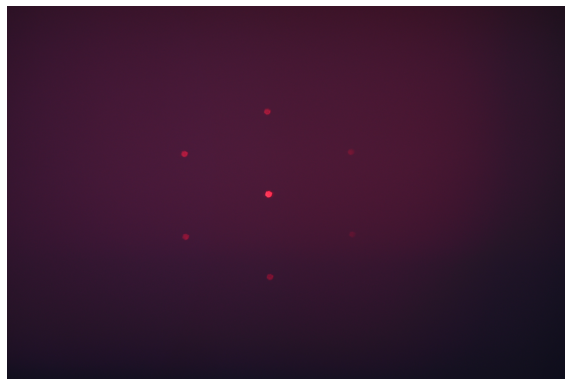

(2008, 3008, 3)


In [4]:
img_name = 'P10_8175.JPG'
dir_name = 'Bright-Signal'
img_path = os.path.join(dir_name, img_name)
img = cv2.imread(img_path)
show(img)
print(img.shape)

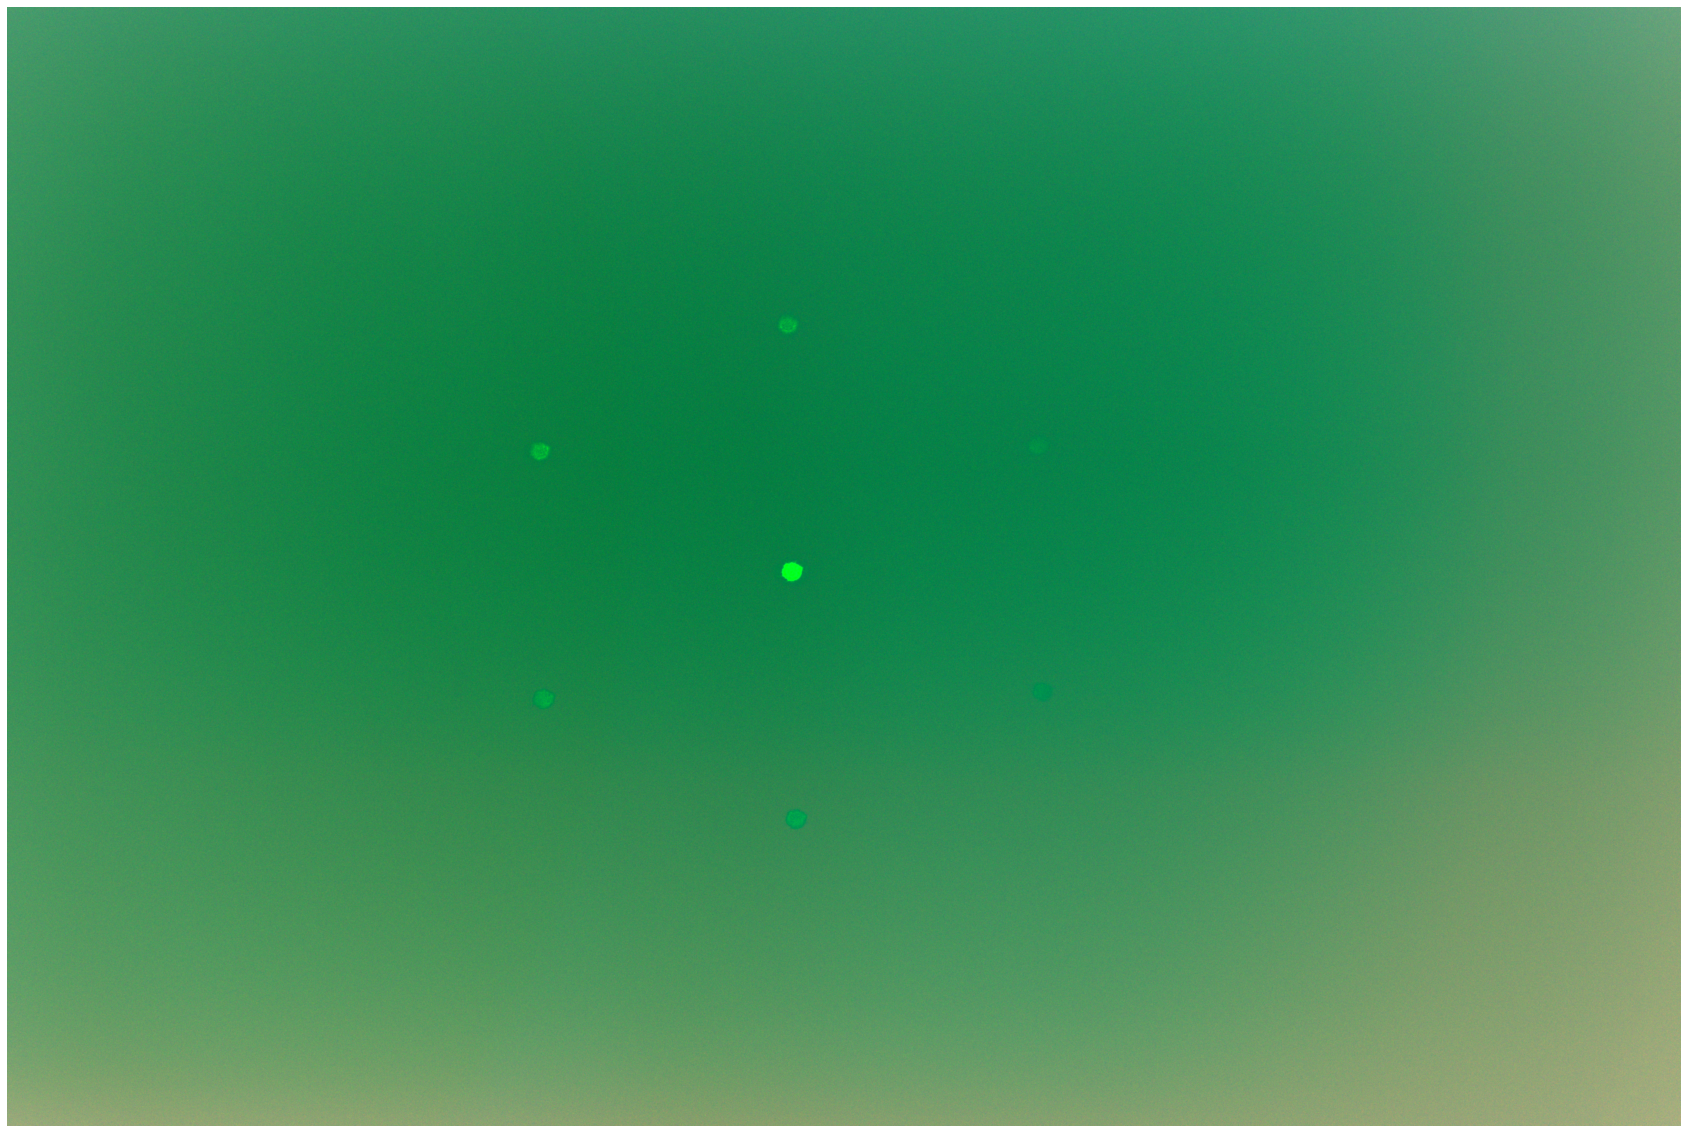

(4032, 6032, 3)


In [5]:
import rawpy
from PIL import Image

raw_name = 'P10_8175.NEF'
raw_path = os.path.join(dir_name, raw_name)
raw = rawpy.imread(raw_path)
# rgb = raw.postprocess(output_color=rawpy.ColorSpace.raw, gamma=(1, 1), use_camera_wb=False, output_bps=8,
#                       user_wb=[1.0, 1.0, 1.0, 1.0], no_auto_bright=True, bright=1.0,
#                       demosaic_algorithm=rawpy.DemosaicAlgorithm.LINEAR)
rgb = raw.postprocess()

rgb = cv2.cvtColor(rgb, cv2.COLOR_RGB2BGR)
rgb = cv2.bitwise_not(rgb)
img_raw = Image.fromarray(rgb)  # Pillow image
show_raw(rgb)
print(rgb.shape)

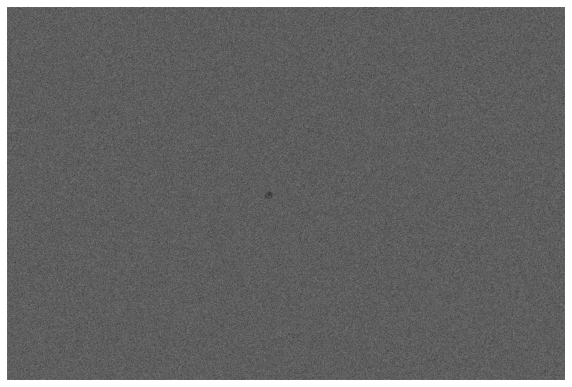

In [6]:
gray = cv2.cvtColor(rgb, cv2.COLOR_BGR2GRAY)
# inverted = cv2.bitwise_not(gray)
edges = cv2.Canny(gray, 6, 3)
show(edges)


In [7]:
test = raw.raw_image.copy()
test[test < 1500] = 0
print(test)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


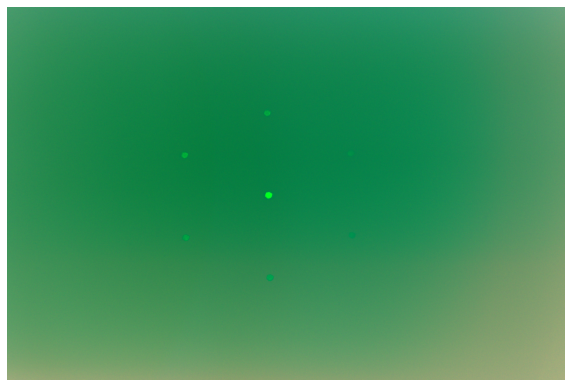

In [8]:
alpha = 1.0  # Contrast control (1.0-3.0)
beta = 0  # Brightness control (0-100)
gray = cv2.cvtColor(rgb, cv2.COLOR_BGR2GRAY)
res = cv2.convertScaleAbs(rgb, alpha=alpha, beta=beta)

show(res)

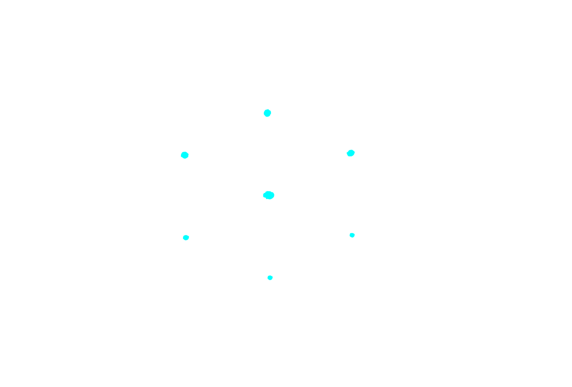

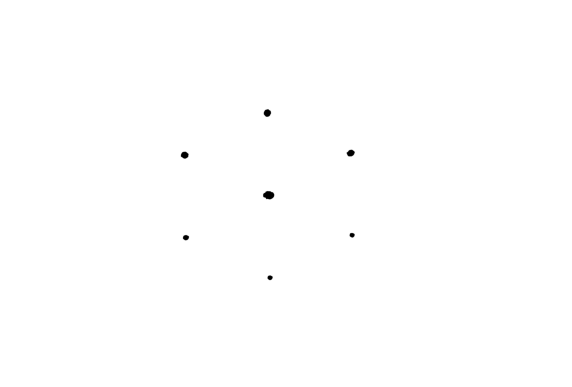

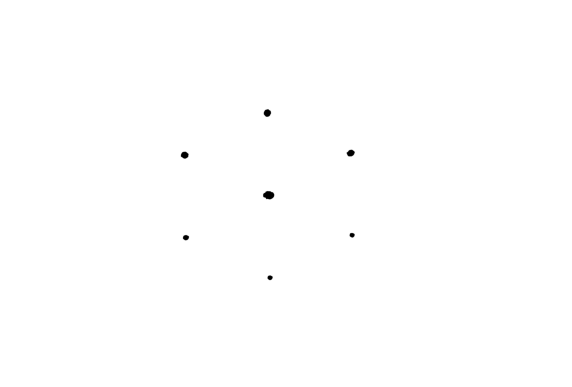

True

In [19]:
thresh = 2
maxval = 255
gray = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(res, (35,35), 0)
bilateral = cv2.bilateralFilter(blur, 11, 75, 75)

ret, thresh1 = cv2.threshold(bilateral, thresh, maxval, cv2.THRESH_BINARY)
# res = res.astype(np.uint8)

# th3 = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 43, 3)
show(thresh1)
b, g, r = cv2.split(thresh1)
show(r)
ret, gray_thr = cv2.threshold(r, 127, 255, cv2.THRESH_BINARY)
show(gray_thr)
cv2.imwrite('map1.png', cv2.cvtColor(gray_thr, cv2.COLOR_BGR2RGB))
# show(th3)
# show(bilateral)

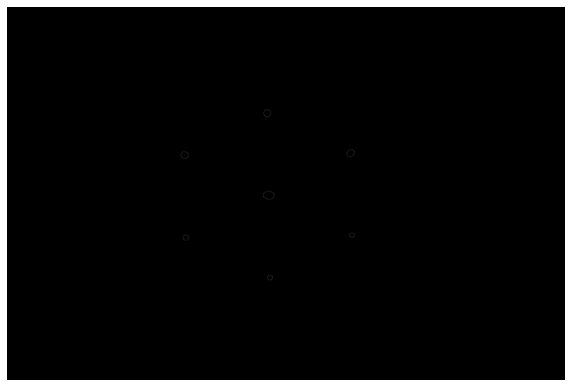

In [10]:
edges = cv2.Canny(thresh1, 10, 35)
show(edges)

In [11]:
contours, hierarchy = cv2.findContours(thresh1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
height, width, channels = img.shape
im1 = blank_image = np.zeros((height,width,3), np.uint8)
im1 = cv2.drawContours(im1, contours, -1, (0, 255, 0), 2)
show(im1)

error: OpenCV(4.6.0) /opt/conda/conda-bld/opencv-suite_1664548337286/work/modules/imgproc/src/contours.cpp:195: error: (-210:Unsupported format or combination of formats) [Start]FindContours supports only CV_8UC1 images when mode != CV_RETR_FLOODFILL otherwise supports CV_32SC1 images only in function 'cvStartFindContours_Impl'


In [ ]:
import rawpy
from PIL import Image

raw_name = 'P10_8175.NEF'
raw_path = os.path.join(dir_name, raw_name)
raw = rawpy.imread(raw_path)
rgb = raw.postprocess(output_color=rawpy.ColorSpace.raw, gamma=(1, 1), use_camera_wb=False, output_bps=8,
                      user_wb=[1.0, 1.0, 1.0, 1.0], no_auto_bright=True, bright=1.0,
                      demosaic_algorithm=rawpy.DemosaicAlgorithm.LINEAR)
# rgb = raw.postprocess(output_color=rawpy.ColorSpace.sRGB)

rgb = cv2.cvtColor(rgb, cv2.COLOR_RGB2BGR)
# rgb = cv2.bitwise_not(rgb)
img_raw = Image.fromarray(rgb)  # Pillow image
show(rgb)

b, g, r = cv2.split(rgb)
ret, newIm = cv2.threshold(r, 4, 255, cv2.THRESH_BINARY)
newIm = cv2.bitwise_not(newIm)
show(newIm)